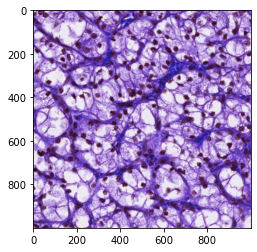

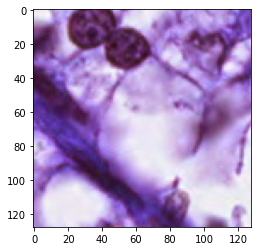

In [1502]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('C:/TissueImages/TCGA-B0-5698-01Z-00-DX1.tif') 
image=img[0:1000,1:1000]
image.shape
cropped_image=image[0:128,1:129]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image)

# In order not to extend the code, the names of the photos in the code were changed and cropped one by one. 
#This is our sample crop process.
#Crop process ends in line 105.
#We designed the process to be 140x140.

In [1503]:
 print( cropped_image.shape)

(128, 128, 3)


In [1504]:
result=cv2.imwrite(r'C:/images/image/cropped_image1.tif', cropped_image)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


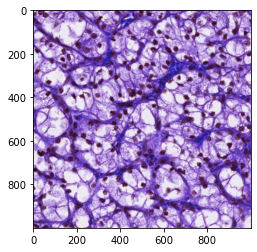

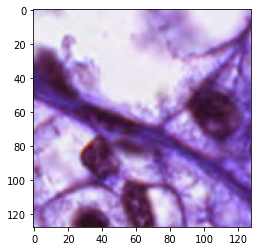

In [1505]:
cropped_image2=image[100:228,101:229]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image2)

In [1506]:
 print( cropped_image2.shape)

(128, 128, 3)


In [1507]:
result=cv2.imwrite(r'C:/images/image/cropped_image2.tif', cropped_image2)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


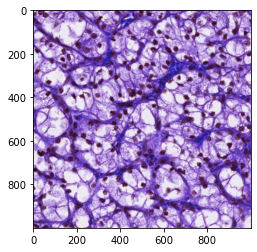

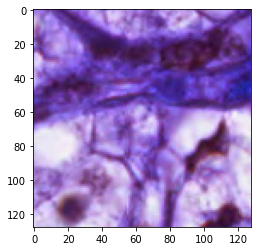

In [1508]:
cropped_image3=image[200:328,201:329]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image3)


In [1509]:
print( cropped_image3.shape)


(128, 128, 3)


In [1510]:
result=cv2.imwrite(r'C:/images/image/cropped_image3.tif', cropped_image3)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


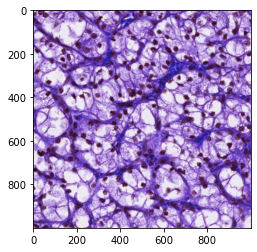

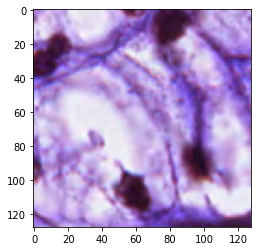

In [1511]:
cropped_image4=image[300:428,301:429]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image4)

In [1512]:
print( cropped_image4.shape)

(128, 128, 3)


In [1513]:
result=cv2.imwrite(r'C:/images/image/cropped_image4.tif', cropped_image4)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


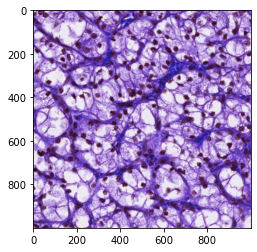

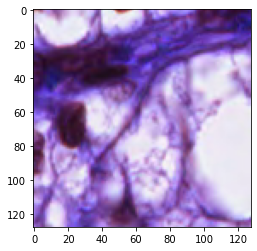

In [1514]:
cropped_image5=image[400:528,401:529]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image5)

In [1515]:
print( cropped_image5.shape)

(128, 128, 3)


In [1516]:
result=cv2.imwrite(r'C:/images/image/cropped_image5.tif', cropped_image5)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


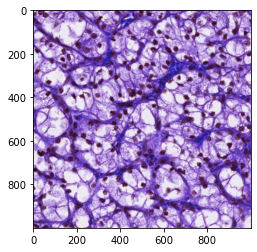

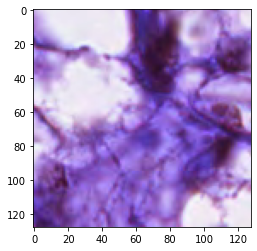

In [1517]:
cropped_image6=image[500:628,501:629]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image6)

In [1518]:
print( cropped_image6.shape)

(128, 128, 3)


In [1519]:
result=cv2.imwrite(r'C:/images/image/cropped_image6.tif', cropped_image6)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


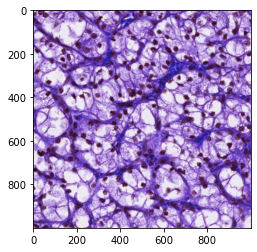

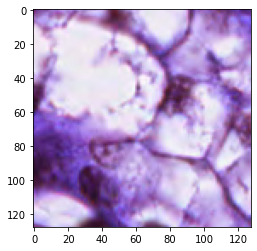

In [1520]:
cropped_image7=image[600:728,601:729]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image7)

In [1521]:
print( cropped_image7.shape)

(128, 128, 3)


In [1522]:
result=cv2.imwrite(r'C:/images/image/cropped_image7.tif', cropped_image7)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


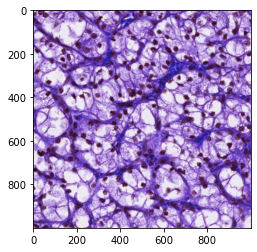

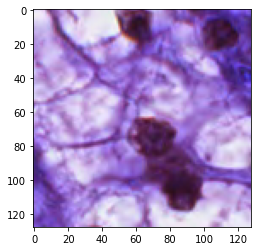

In [1523]:
cropped_image8=image[700:828,701:829]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image8)

In [1524]:
print( cropped_image8.shape)

(128, 128, 3)


In [1525]:
result=cv2.imwrite(r'C:/images/image/cropped_image8.tif', cropped_image8)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


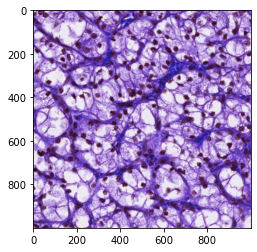

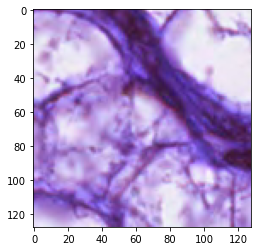

In [1526]:
cropped_image9=image[800:928,801:929]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image9)

In [1527]:
print( cropped_image9.shape)

(128, 128, 3)


In [1528]:
result=cv2.imwrite(r'C:/images/image/cropped_image9.tif', cropped_image9)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


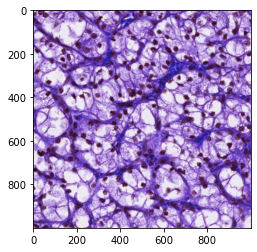

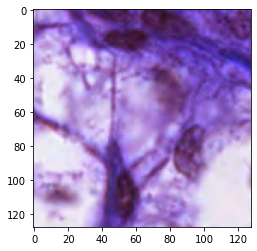

In [1529]:
cropped_image10=image[870:998,871:999]
cropped_image.shape
plt.imshow(img)
plt.show()
plt.imshow(cropped_image10)

In [1530]:
print( cropped_image10.shape)

(128, 128, 3)


In [1531]:
result=cv2.imwrite(r'C:/images/image/cropped_image10.tif', cropped_image10)
if result==True:
    print("File saved successfully")
else:
    print("Error in saving file")

File saved successfully


In [1381]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

In [1640]:
img = cv2.imread("C:/images/image/cropped_image10.tif")
cells=img[:,:,0]

In [1641]:
pixels_to_um=0.454 #1 pixel =454 nm
ret1,thresh=cv2.threshold(cells,0,1000,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [1642]:
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations=2)

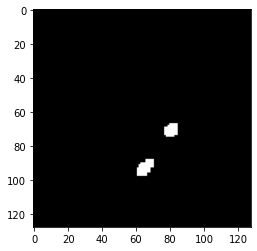

In [1643]:
from skimage.segmentation import clear_border
opening= clear_border(opening)
plt.imshow(opening,cmap='gray')

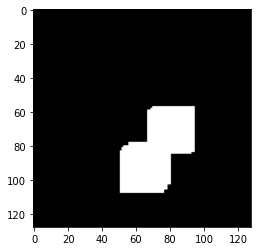

In [1644]:
sure_bg=cv2.dilate(opening,kernel,iterations=10)
plt.imshow(sure_bg,cmap='gray')

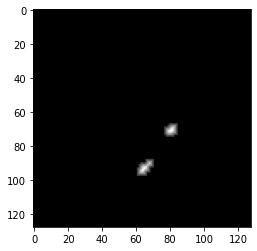

In [1645]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.imshow(dist_transform,cmap='gray')

3.5969


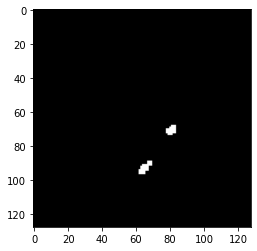

In [1646]:
print(dist_transform.max())
ret2,sure_fg=cv2.threshold(dist_transform,0.5*dist_transform.max(),1000,0)
plt.imshow(sure_fg,cmap='gray')


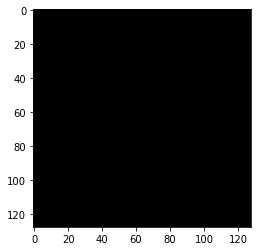

In [1647]:
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_bg)
plt.imshow(unknown,cmap='gray')

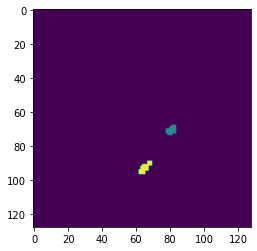

In [1648]:
ret3, markers=cv2.connectedComponents(sure_fg)
plt.imshow(markers)

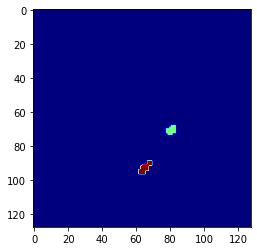

In [1649]:
markers=markers+10
markers[unknown==1000]=0
plt.imshow(markers,cmap='jet')

In [1650]:
markers=cv2.watershed(img,markers)

In [1651]:
result=cv2.imwrite(r'C:/images/label/cropped_mask10.tif', sure_fg) 
if result==True:
    print("File saved successfully") 
else: 
    print("Error in saving file")

File saved successfully
